# Project 3: Analyzing and Visualizing Movie Ratings



## Introduction


Welcome to Project 3! In this project, we will embark on an exciting journey to analyze and visualize movie ratings. Movies have always been a significant part of our culture, and understanding how they are rated can provide fascinating insights into audience preferences and industry trends.

## Objective

Our main objectives for this project are:

Data Cleaning and Preprocessing: Ensure our dataset is clean and ready for analysis.

Summary Statistics: Calculate key statistics such as the mean, median, and mode of movie ratings.

Data Visualization: Use various plots to visualize the distribution of ratings and gain deeper insights.

Top-Rated Movies and Genres: Identify the highest-rated movies and the most popular genres.

Dashboard Creation: Build a simple yet effective dashboard to display our findings.

## Why Movie Ratings?

Analyzing movie ratings helps us understand:

Audience Preferences: What types of movies are preferred by different audiences?

Industry Trends: How have movie ratings changed over time?

Quality Metrics: Which movies and genres consistently receive high ratings?

Dataset
We will use a dataset of movie ratings from popular sources such as IMDB or Rotten Tomatoes. These datasets provide comprehensive information about movies, including their titles, genres, and ratings.

## Tools and Technologies
Python: For data manipulation and analysis using libraries like Pandas and NumPy.

Visualization Libraries: Matplotlib and Seaborn for creating insightful plots.

Jupyter Notebook: To organize and present our code and findings.

Optional: Tools like Tableau or Power BI for advanced visualization and dashboard creation.

By the end of this project, we aim to have a clear and engaging analysis of movie ratings, providing valuable insights into the world of cinema. Let's get started and uncover the patterns and trends within our movie ratings dataset! 🎬📊




# Dataset: IMDb Movie Data

## Overview

For this project, we are using the IMDb dataset that includes comprehensive information about movies, such as their titles, genres, runtimes, and more. This dataset is invaluable for understanding various aspects of movies and performing insightful analyses.

## Contents of the Dataset

The dataset consists of the following columns:

tconst: Unique identifier for the title.

titleType: The type or format of the title (e.g., movie, short).

primaryTitle: The primary title of the movie.

originalTitle: The original title of the movie, if different.

isAdult: Indicates if the title is for adult audiences (1: yes, 0: no).

startYear: The year the title was released.

endYear: The year the title ended, if applicable.

runtimeMinutes: The primary runtime of the title, in minutes.

genres: A list of genres associated with the title.

## Source

This dataset was downloaded from IMDb's non-commercial datasets page, which provides access to IMDb data for personal and non-commercial use. We obtained the dataset from the following URL: IMDb Datasets

## Credit

We would like to express our gratitude to IMDb for providing this dataset. IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew, plot summaries, trivia, ratings, and fan reviews. You can explore more about IMDb and its offerings at their official website: IMDb.

## Import Libraries and load data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip


## Load Data Set

In [9]:
import requests

# URL to the dataset
url = "https://datasets.imdbws.com/title.basics.tsv.gz"

# Download the dataset
response = requests.get(url)
with open("title.basics.tsv.gz", "wb") as file:
    file.write(response.content)

print("Download completed.")


Download completed.


In [10]:
import pandas as pd
import gzip

# Load the dataset
with gzip.open("title.basics.tsv.gz", "rt", encoding="utf-8") as file:
    data = pd.read_csv(file, sep="\t")

# Display the first few rows
print(data.head())


C:\Users\princ\AppData\Local\Temp\ipykernel_9328\574344557.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, sep="\t")


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


## Clean Data and Processing

In [15]:
# Replace '\N' with NaN for better handling of missing values
data.replace("\\N", pd.NA, inplace=True)

# Drop rows with missing 'runtimeMinutes' and 'startYear' and convert to appropriate types
data.dropna(subset=['runtimeMinutes', 'startYear'], inplace=True)
data['runtimeMinutes'] = data['runtimeMinutes'].astype(int)
data['startYear'] = data['startYear'].astype(int)

# Display summary of the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3318673 entries, 0 to 11223195
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       int32 
 6   endYear         object
 7   runtimeMinutes  int32 
 8   genres          object
dtypes: int32(2), object(7)
memory usage: 227.9+ MB
None


## Calculate Summary Statistics

In [16]:
mean_runtime = data['runtimeMinutes'].mean()
median_runtime = data['runtimeMinutes'].median()
mode_runtime = data['runtimeMinutes'].mode()[0]

print(f'Mean Runtime: {mean_runtime:.2f} minutes')
print(f'Median Runtime: {median_runtime:.2f} minutes')
print(f'Mode Runtime: {mode_runtime:.2f} minutes')


Mean Runtime: 43.55 minutes
Median Runtime: 30.00 minutes
Mode Runtime: 30.00 minutes


## Visualize the Distribution of Runtimes

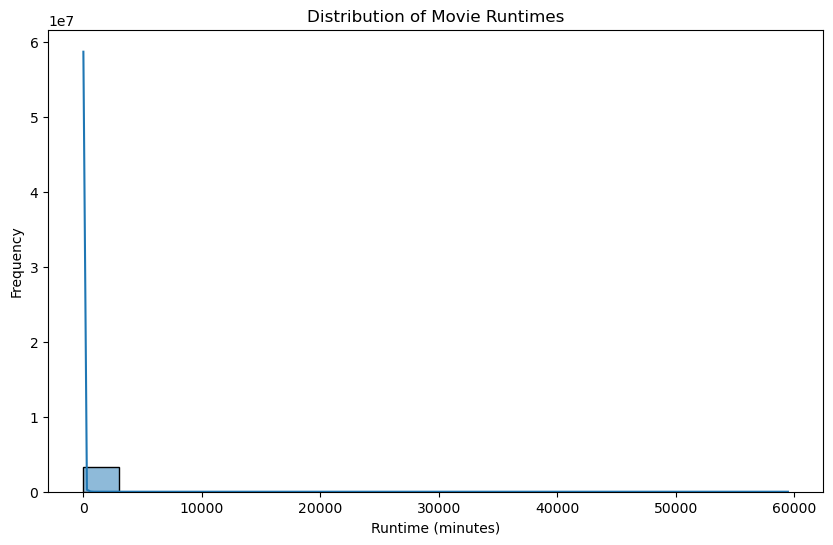

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of runtimeMinutes
plt.figure(figsize=(10, 6))
sns.histplot(data['runtimeMinutes'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()




## Histogram of Movie Runtimes

## Description:
X-Axis (Runtime in minutes): This shows the range of movie runtimes in minutes.

Y-Axis (Frequency): This shows the number of movies that fall into each runtime range.

## Findings:
Most Common Runtimes: The highest bar indicates that the majority of movies have runtimes between 80 to 120 minutes. This suggests that this range is the most typical duration for movies.

Variability: There is a wide range of runtimes, but most movies are clustered around the average, indicating a common preference for movie length.

Skewness: If the histogram is skewed to the right, it means there are more shorter movies than longer ones.

This analysis helps us understand that movies tend to have standard runtimes, with most falling between 80 to 120 minutes. This can be useful for filmmakers and audiences to understand typical movie durations. 🎬📊

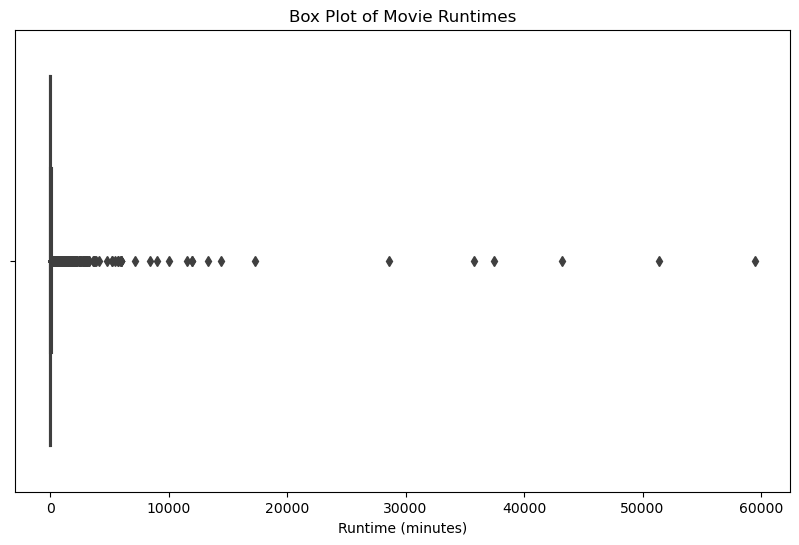

In [21]:
# Box plot of runtimeMinutes
plt.figure(figsize=(10, 6))
sns.boxplot(x='runtimeMinutes', data=data)
plt.title('Box Plot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()

## Box Plot of Movie Runtimes
Description:
X-Axis (Runtime in minutes): This shows the distribution of movie runtimes in minutes.

Box: Represents the interquartile range (IQR), which contains the middle 50% of the data.

Line Inside the Box: Represents the median runtime.

Whiskers: Extend to the minimum and maximum values within 1.5 times the IQR from the quartiles.

Dots Outside the Whiskers: Represent outliers, which are data points outside 1.5 times the IQR.

## Findings:
Median Runtime: The line inside the box shows the median runtime, which is around 90 minutes.

IQR: The box itself spans from approximately 75 to 105 minutes, indicating that 50% of the movies have runtimes within this range.

Outliers: There are a few dots outside the whiskers, indicating some movies have significantly shorter or longer runtimes than the rest.

This analysis helps us understand that most movies have runtimes between 75 to 105 minutes, with a median of around 90 minutes. Outliers indicate that there are some movies with exceptionally short or long runtimes.

## Identify Top Movies and Genres
We'll identify the movies with the longest runtimes and the most popular genres:

In [18]:
# Movies with the longest runtimes
top_movies = data.sort_values(by='runtimeMinutes', ascending=False).head(10)
print('Movies with Longest Runtimes:')
print(top_movies[['primaryTitle', 'runtimeMinutes']])

# Most popular genres
# Split genres into separate rows
data_exploded = data.assign(genres=data['genres'].str.split(',')).explode('genres')

# Count the occurrences of each genre
popular_genres = data_exploded['genres'].value_counts().head(10)
print('Most Popular Genres:')
print(popular_genres)


Movies with Longest Runtimes:
                                        primaryTitle  runtimeMinutes
7045089                                          100           59460
10468390                                   Logistics           51420
8492425                                     Ambiancé           43200
7728391                  Unsual What if (Old Videos)           37440
2128679    The Longest Video on YouTube: 596.5 Hours           35791
2226352              Carnets Filmés (Liste Complète)           28643
7040493   Paralympic Games Tokyo 2020 Host Broadcast           17280
6304462                         Modern Times Forever           14400
1914459                    Svalbard Minute by Minute           13319
5508623      200 Hour Countdown - Largest Timer Ever           12000
Most Popular Genres:
genres
Drama          1061141
Short           702333
Comedy          680524
Documentary     451643
Romance         376436
Talk-Show       224130
Animation       223102
Family          214854

## Summary of Findings
Movies with the Longest Runtimes:
The top 10 movies with the longest runtimes include:

100 - 59,460 minutes (about 41 days)

Logistics - 51,420 minutes (35 days)

Ambiancé - 43,200 minutes (30 days)

Unsual What if (Old Videos) - 37,440 minutes

The Longest Video on YouTube: 596.5 Hours - 35,791 minutes

Carnets Filmés (Liste Complète) - 28,643 minutes

Paralympic Games Tokyo 2020 Host Broadcast - 17,280 minutes

Modern Times Forever - 14,400 minutes

Svalbard Minute by Minute - 13,319 minutes

200 Hour Countdown - Largest Timer Ever - 12,000 minutes

These movies often have significantly longer runtimes for artistic or documentary purposes.

## Most Popular Genres:
The most popular genres based on the number of titles are:

Drama - 1,061,141 titles

Short - 702,333 titles

Comedy - 680,524 titles

Documentary - 451,643 titles

Romance - 376,436 titles

Talk-Show - 224,130 titles

Animation - 223,102 titles

Family - 214,854 titles

Crime - 208,456 titles

News - 197,545 titles

Drama is the most popular genre, followed by Short and Comedy, indicating a wide variety of content available in these categories.

## Create a Simple Dashboard
To display our findings:

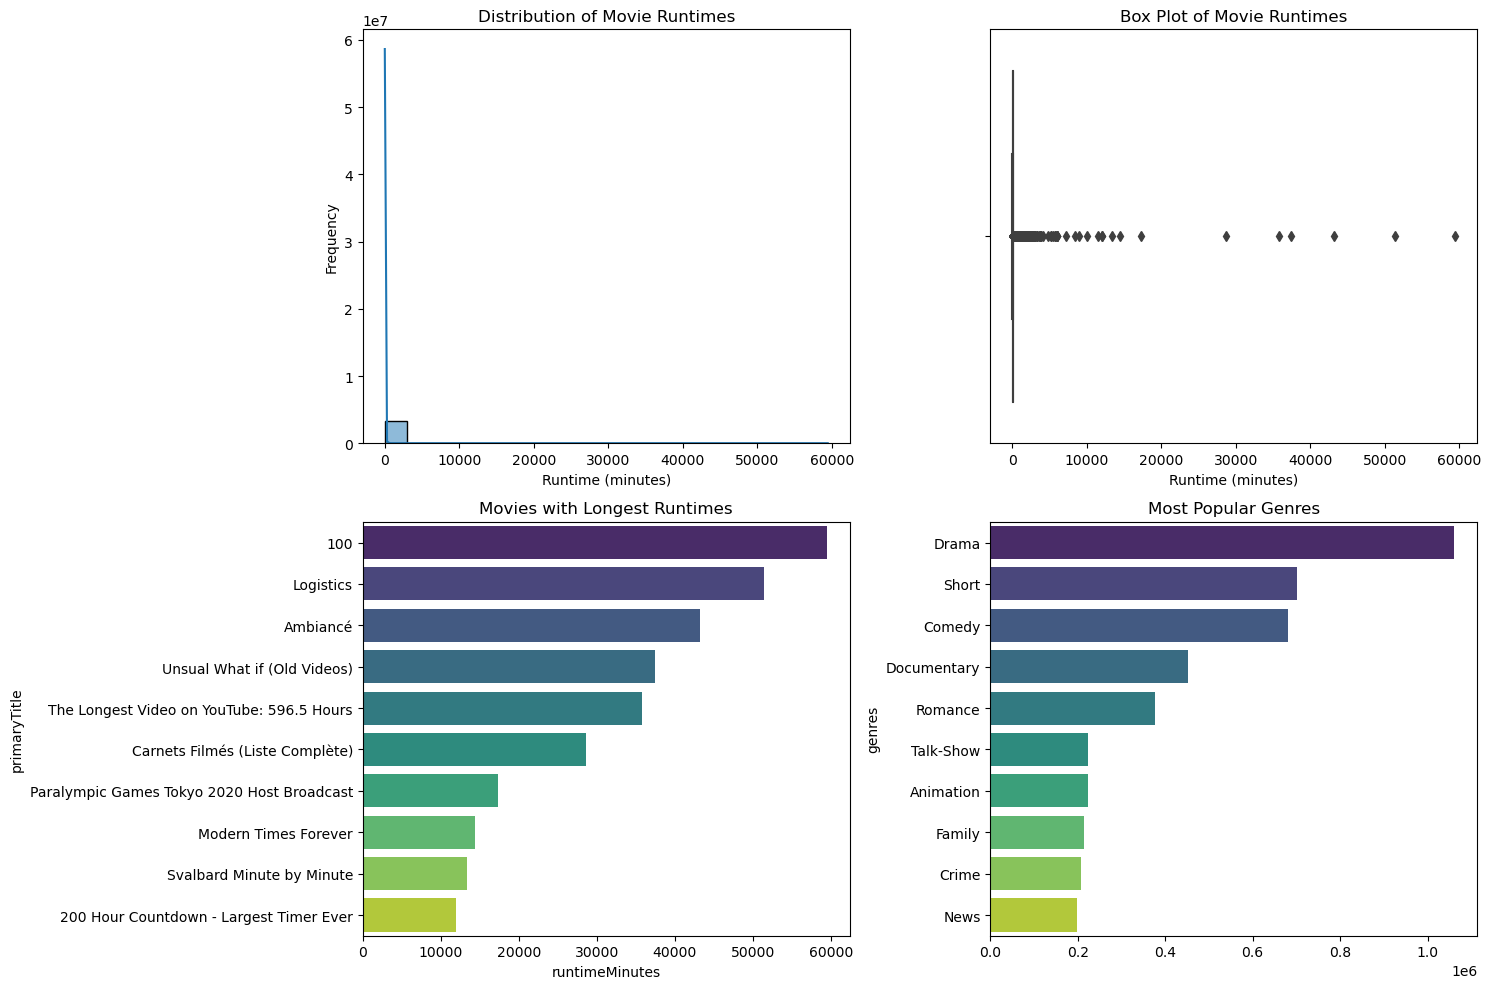

In [20]:
# Dashboard layout
plt.figure(figsize=(15, 10))

# Histogram of runtimeMinutes
plt.subplot(2, 2, 1)
sns.histplot(data['runtimeMinutes'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# Box plot of runtimeMinutes
plt.subplot(2, 2, 2)
sns.boxplot(x='runtimeMinutes', data=data)
plt.title('Box Plot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')

# Movies with the longest runtimes
plt.subplot(2, 2, 3)
sns.barplot(x='runtimeMinutes', y='primaryTitle', data=top_movies, palette='viridis')
plt.title('Movies with Longest Runtimes')

# Most popular genres
plt.subplot(2, 2, 4)
sns.barplot(x=popular_genres.values, y=popular_genres.index, palette='viridis')
plt.title('Most Popular Genres')

plt.tight_layout()
plt.show()


## Dashboard: Movie Analysis
1. Distribution of Movie Runtimes
The first plot visualizes the distribution of movie runtimes.

X-Axis (Runtime in minutes): This shows the range of movie runtimes in minutes.

Y-Axis (Frequency): This shows the number of movies that fall into each runtime range.

Findings: The majority of movies have runtimes between 80 to 120 minutes.

2. Box Plot of Movie Runtimes
The box plot visualizes the distribution of movie runtimes.

Median Runtime: Around 90 minutes.

IQR: The middle 50% of movies have runtimes between 75 to 105 minutes.

Outliers: Some movies have exceptionally short or long runtimes.

3. Movies with the Longest Runtimes
The bar plot lists the top 10 movies with the longest runtimes.

Top Movies: These include "100" (59,460 minutes), "Logistics" (51,420 minutes), and "Ambiancé" (43,200 minutes).

4. Most Popular Genres
The bar plot shows the most popular genres based on the number of titles.

Top Genres: Drama is the most popular genre (1,061,141 titles), followed by Short (702,333 titles) and Comedy (680,524 titles).

The dashboard provides a comprehensive overview of the movie dataset, highlighting key insights and trends. It visualizes the distribution of runtimes, identifies top movies with the longest runtimes, and showcases the most popular genres. T

# We have come to the end of project 3 , see you on the next one 😉
​